# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Omicron-UK"

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [1]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
from collections import namedtuple

## 1. Carga de datos (0.5 puntos)

Tomaremos los datos de un fichero de entrada llamado <code>omicron.csv</code> en el que se encuentran registrados datos sobre los casos en Reino Unido de covid-19 indicando los que corresponden a la variante 'omicron'. El fichero se encuentra en la carpeta <code>./data</code>. Cada línea del fichero de entrada contiene las siguientes informaciones:

- **region:** región de Reino Unido a la que corresponden los datos
- **fecha:** fecha a la que corresponden los datos
- **casos:** número de casos registrados
- **omicron:** indica si los casos corresponden a la variante omicron (*True*, o *False*)

He aquí un fragmento con las primeras líneas del fichero de entrada:

<img src="./img/datos.PNG" alt="Drawing"/>

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [2]:
Registro = namedtuple('Registro', 'region fecha casos omicron')

def lee_registros(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Registro(str, datetime.date, int, bool)]

    Hay que transformar ciertos elementos de la entrada con los tipos correctos para que puedan 
    ser procesados posteriormente.
    Para convertir la fecha del registro de tipo str a datetime puedes usar la expresión:
       datetime.strptime(fecha, '%d/%m/%Y').date()
       
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        registros = [Registro(region, datetime.strptime(fecha, '%d/%m/%Y').date(), int(casos), omicron=='True')
                    for region, fecha, casos, omicron in lector]
    return registros

In [3]:
# Test de la función lee_registros
REGISTROS = lee_registros('./data/omicron.csv')

# La salida esperada de la siguiente instrucción es: 
# 670 [Registro(region='East Midlands', fecha=datetime.date(2021, 11, 1), casos=874, omicron=False), 
#      Registro(region='East Midlands', fecha=datetime.date(2021, 11, 2), casos=724, omicron=False), 
#      Registro(region='East Midlands', fecha=datetime.date(2021, 11, 2), casos=1, omicron=True)]
print(len(REGISTROS), REGISTROS[:3])

670 [Registro(region='East Midlands', fecha=datetime.date(2021, 11, 1), casos=874, omicron=False), Registro(region='East Midlands', fecha=datetime.date(2021, 11, 2), casos=724, omicron=False), Registro(region='East Midlands', fecha=datetime.date(2021, 11, 2), casos=1, omicron=True)]


## 2. Consulta y filtrado (7.5 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función se llama <code>calcula_regiones</code> y obtiene la lista de regiones presentes en el conjunto de datos, ordenada alfabéticamente.

In [4]:
def calcula_regiones(registros):
    ''' Lista ordenada de regiones
    
    ENTRADA:
       - registros: lista de registros -> [Registro(str, datetime.date, int, bool)]
    SALIDA:
       - Lista de regiones distintas ordenada alfabéticamente -> [str]
    '''
    return sorted(list({r.region for r in registros}))

In [5]:
# Test de la función calcula_regiones

# La salida esperada de las siguientes instrucciones es: 
# ['East Midlands', 'East of England', 'London', 'North East', 'North West', 
#  'South East', 'South West', 'West Midlands', 'Yorkshire and Humber']

print(calcula_regiones(REGISTROS))

['East Midlands', 'East of England', 'London', 'North East', 'North West', 'South East', 'South West', 'West Midlands', 'Yorkshire and Humber']


La siguiente función se llama <code>filtra_omicron_por_region</code>. Toma una lista de registros, una lista de regiones y un parámetro para indicar si queremos los casos de omicron o los que no lo son. Deberá seleccionar solamente aquellos registros de las regiones indicadas y el tipo de virus indicado.

In [6]:
def filtra_omicron_por_region(registros, regiones=None, omicron=True):
    ''' Selecciona registros por regiones y tipo de virus. 
        Si el parámetro 'regiones' es None se tendrán en cuenta todas las regiones.
    
    ENTRADA:
       - registros: lista de registros -> [Registro(str, datetime.date, int, bool)]
       - regiones: regiones a tener en cuenta -> [str]
       - omicron: tipo de virus (omicron o no) a tener en cuenta -> bool
    SALIDA:
       - lista de registros seleccionados -> [Registro(str, datetime.date, int, bool)]
    '''
    if regiones is None:
        filtrados = [r for r in registros if r.omicron == omicron]
    else:
        filtrados = [r for r in registros if r.region in regiones and r.omicron == omicron]
    return filtrados

In [7]:
# Test de la función filtra_omicron_por_region

# La salida esperada de las siguientes instrucciones es: 
# 283 [Registro(region='East Midlands', fecha=datetime.date(2021, 11, 2), casos=1, omicron=True), 
#      Registro(region='East Midlands', fecha=datetime.date(2021, 11, 5), casos=1, omicron=True), 
#      Registro(region='East Midlands', fecha=datetime.date(2021, 11, 8), casos=4, omicron=True)]
#
# 86 [Registro(region='East Midlands', fecha=datetime.date(2021, 11, 1), casos=874, omicron=False), 
#     Registro(region='East Midlands', fecha=datetime.date(2021, 11, 2), casos=724, omicron=False), 
#     Registro(region='East Midlands', fecha=datetime.date(2021, 11, 3), casos=757, omicron=False)]

filtrados = filtra_omicron_por_region(REGISTROS)
print(len(filtrados), filtrados[:3])
print()
filtrados = filtra_omicron_por_region(REGISTROS, ['East Midlands', 'London'], False)
print(len(filtrados), filtrados[:3])

283 [Registro(region='East Midlands', fecha=datetime.date(2021, 11, 2), casos=1, omicron=True), Registro(region='East Midlands', fecha=datetime.date(2021, 11, 5), casos=1, omicron=True), Registro(region='East Midlands', fecha=datetime.date(2021, 11, 8), casos=4, omicron=True)]

86 [Registro(region='East Midlands', fecha=datetime.date(2021, 11, 1), casos=874, omicron=False), Registro(region='East Midlands', fecha=datetime.date(2021, 11, 2), casos=724, omicron=False), Registro(region='East Midlands', fecha=datetime.date(2021, 11, 3), casos=757, omicron=False)]


La siguiente función se llama <code>extrae_region_por_fecha</code>. Toma una lista de registros, una región y dos fechas entre las que debe encontrarse la fecha de los registros seleccionados (estas fechas están en formato <code>datetime</code>, no <code>str</code>). Produce como salida una lista de tuplas <code>(fecha, casos, omicron)</code> por orden decreciente de número de casos.

In [8]:
def extrae_region_por_fecha(registros, region, fecha_ini, fecha_fin):
    ''' Extrae las tres columnas (fecha, casos, omicron) para los registros de la región indicada y 
        con fecha entre las dos indicadas (o igual a cualquiera de ellas).
    
    ENTRADA:
       - registros: lista de registros -> [Registro(str, datetime.date, int, bool)]
       - region: para la que se extraerán los datos -> str
       - fecha_ini: fecha inicial del periodo de interés -> datetime
       - fecha_fin: fecha final del periodo de interés -> datetime
    SALIDA:
       - lista de tuplas (fecha, casos, omicron) -> [(datetime.date, int, bool)]
    
    '''
    resultado = [(r.fecha, r.casos, r.omicron) for r in registros if r.region == region and fecha_ini <= r.fecha <= fecha_fin]
    
    return sorted(resultado, reverse=True, key=lambda x:x[1])

In [9]:
# Test de la función extrae_datos_por_fecha

# La salida esperada de las siguientes instrucciones es:
# 14 [(datetime.date(2021, 12, 6), 2300, False), (datetime.date(2021, 12, 7), 2056, False),
#    (datetime.date(2021, 12, 4), 1888, False), (datetime.date(2021, 12, 1), 1708, False),
#    (datetime.date(2021, 12, 2), 1619, False), (datetime.date(2021, 12, 3), 1552, False),
#    (datetime.date(2021, 12, 5), 1400, False), (datetime.date(2021, 12, 7), 655, True),
#    (datetime.date(2021, 12, 6), 355, True), (datetime.date(2021, 12, 5), 161, True)]
fecha1 = datetime(2021, 12, 1).date()
fecha2 = datetime(2021, 12, 7).date()
datos = extrae_region_por_fecha(REGISTROS, 'London', fecha1, fecha2)
print(len(datos), datos[:10])

14 [(datetime.date(2021, 12, 6), 2300, False), (datetime.date(2021, 12, 7), 2056, False), (datetime.date(2021, 12, 4), 1888, False), (datetime.date(2021, 12, 1), 1708, False), (datetime.date(2021, 12, 2), 1619, False), (datetime.date(2021, 12, 3), 1552, False), (datetime.date(2021, 12, 5), 1400, False), (datetime.date(2021, 12, 7), 655, True), (datetime.date(2021, 12, 6), 355, True), (datetime.date(2021, 12, 5), 161, True)]


La siguiente función de esta sección se llama <code>seleccionar_regiones</code>. Toma como entradas una lista de registros y una función que define una condición, y devuelve la lista de regiones sin repetición para las que hay al menos un registro que cumpla esa condición.

In [10]:
def seleccionar_regiones(registros, condicion):
    ''' Calcula las regiones para las que hay al menos un registro que cumple la condición
    
    ENTRADA:
       - registros: lista de registros -> [Registro(str, datetime.date, int, bool)]
       - condicion: nombre de función, o expresión lambda -> function (Registro -> bool)
    SALIDA:
       - regiones para las que hay registros que cumplen la condición -> [str]
    '''
    return set([r.region for r in registros if condicion(r)])

In [11]:
### EJERCICIO: implementar una llamada de TEST de 'seleccionar_regiones' que obtenga las regiones
# en las que ha habido más de 1200 casos de omicron en un mismo día.

# La salida esperada para esta consulta es:
#    {'London', 'North West', 'East of England'}

print(seleccionar_regiones(REGISTROS, lambda r:r.casos > 1200 and r.omicron == True))

{'East of England', 'London', 'North West'}


La siguiente función se llama <code>casos_por_fecha</code>. Toma como entrada una lista de registros y una región, y produce como salida un diccionario cuyas claves son las fechas y los valores son tuplas con el número de casos total y el porcentaje de casos omicron para esa fecha en esa región.

In [12]:
def casos_por_fecha(registros, region):
    ''' Crea un diccionario con el total de casos y el porcentaje de omicron por fecha
    
    ENTRADA:
       - registros: lista de registros -> [Registro(str, datetime.date, int, bool)]
       - region: región a tener en cuenta -> str
    SALIDA:
       - diccionario con los totales y porcentajes -> {datetime.date: (int, float)}
    '''
    resultado = dict()
    registros = [r for r in registros if r.region == region]
    fechas = {r.fecha for r in registros}
    for fecha in fechas:
        casos_omicron = sum([r.casos for r in registros if r.fecha == fecha and r.omicron == True])
        casos_no_omicron = sum([r.casos for r in registros if r.fecha == fecha and r.omicron == False])
        casos_total = casos_omicron+casos_no_omicron
        resultado[fecha] = (casos_total, casos_omicron/casos_total)
    return resultado

In [13]:
# Test de la función casos_por_fecha

# La salida esperada de la siguiente instrucción es (el orden de los elementos puede variar): 
#   {datetime.date(2021, 11, 5): (952, 0.0010504201680672268),
#   datetime.date(2021, 12, 8): (3058, 0.34924787442773053),
#   datetime.date(2021, 11, 6): (637, 0.0031397174254317113),
#   ...}
casos_por_fecha(REGISTROS, 'London')

{datetime.date(2021, 12, 5): (1561, 0.1031390134529148),
 datetime.date(2021, 11, 25): (1807, 0.0016602102933038186),
 datetime.date(2021, 11, 16): (1657, 0.0024140012070006035),
 datetime.date(2021, 12, 7): (2711, 0.2416082626337145),
 datetime.date(2021, 11, 3): (1277, 0.0015661707126076742),
 datetime.date(2021, 11, 26): (1608, 0.006218905472636816),
 datetime.date(2021, 12, 9): (3765, 0.40185922974767596),
 datetime.date(2021, 11, 8): (1314, 0.00380517503805175),
 datetime.date(2021, 12, 4): (2001, 0.05647176411794103),
 datetime.date(2021, 11, 1): (1057, 0.000946073793755913),
 datetime.date(2021, 11, 20): (1360, 0.0007352941176470588),
 datetime.date(2021, 11, 7): (593, 0.0),
 datetime.date(2021, 12, 6): (2655, 0.1337099811676083),
 datetime.date(2021, 11, 29): (2285, 0.00787746170678337),
 datetime.date(2021, 11, 10): (1166, 0.0),
 datetime.date(2021, 11, 11): (1151, 0.0008688097306689834),
 datetime.date(2021, 11, 13): (1120, 0.0008928571428571428),
 datetime.date(2021, 11, 5):

## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_comparativa_regiones</code>. Toma como entrada una lista de registros, una fecha y una lista de regiones y genera una gráfica de barras con una barra para cada región indicando su número de casos para la fecha indicada.

In [14]:
def muestra_comparativa_regiones(registros, fecha, regiones):
    ''' Genera una gráfica de barras en la que se muestra la comparativa del
    número de casos omicron en un día concreto para las regiones indicadas
    
    ENTRADA: 
       - registros: lista de registros -> [Registro(str, datetime.date, int, bool)]
       - fecha: para la que se generará la gráfica -> datetime.date
       - regiones: de las que se generará la gráfica -> [str]
    SALIDA EN PANTALLA: 
       - diagrama de barras con la comparativa del número de casos por regiones

    Estas son las instrucciones 'matplotlib' para trazar el diagrama de barras:
        plt.title(titulo)
        indice = range(len(l_regiones))
        plt.bar(indice, l_casos)
        plt.xticks(indice, l_regiones, fontsize=8)
        plt.show()

    Que se apoyan en las siguientes variables:
        - titulo: una cadena con el título que se va a mostrar en el gráfico
        - l_regiones: lista de regiones para las que hay datos en la fecha dada
        - l_casos: lista con el total de casos (omicron o no) para la fecha dada en dichas regiones (con el mismo orden)
        
    Para convertir un objeto de tipo date a str puedes usar la expresión:
        fecha.strftime("%d/%m/%Y")
    '''
    registros = [r for r in registros if r.region in regiones and r.fecha == fecha]
    l_regiones = list({r.region for r in registros})
    l_casos = [sum(r.casos for r in registros if r.region == region) for region in l_regiones]
    titulo = 'Casos el ' + fecha.strftime("%d/%m/%Y")
    plt.title(titulo)
    indice = range(len(l_regiones))
    plt.bar(indice, l_casos)
    plt.xticks(indice, l_regiones, fontsize=8)
    plt.show()

La salida de la siguiente celda de test debería ser la siguiente:

<img src="./img/visualizacion.PNG" alt="Drawing" width="400"/>

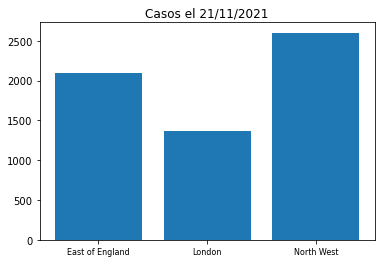

In [15]:
# Test de la función muestra_comparativa_regiones
muestra_comparativa_regiones(REGISTROS,datetime(2021, 11, 21).date(), ['London', 'North West', 'East of England'])